In [311]:
from PIL import Image
import cv2
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [459]:
def softmax(z):
    max_z = np.max(z)
    eta = z - max_z  # Aplicar la subtracción del máximo

    log_softmax = eta - np.log(np.sum(np.exp(eta)))
    softmax_result = np.exp(log_softmax)

    return softmax_result

# Función de costo
def costo(y_true, y_pred):
    M = y_true.shape[0]

    costo = -(1/M) * np.sum(np.sum(y_true * np.log(y_pred + 1e-15)))

    return costo

# Función de gradiente
def gradiente(x, y_true, y_pred):
    M = y_true.shape[0]

    # Gradiente con respecto a los pesos w
    deltaw = np.dot(x.T, (y_pred - y_true)) / M

    # Gradiente con respecto al sesgo b
    deltab = np.sum(y_pred - y_true, axis=0) / M

    return deltaw, deltab

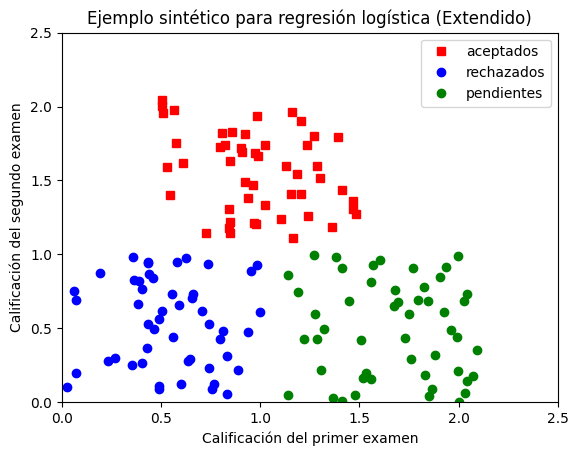

In [512]:
import random
np.random.seed(random.randint(0, 1000))
x = np.random.randn(100, 2)  # 100 ejemplos de 2 características
y = np.random.choice([0, 1, 2], size=100)  # Tres clases

random_points_class0 = np.random.rand(50, 2) * np.array([1, 1])
random_points_class1 = np.random.rand(50, 2) * np.array([1, 1]) + np.array([0.5, 1.1])
random_points_class2 = np.random.rand(50, 2) * np.array([1, 1]) + np.array([1.1, 0])

# Agregar los nuevos puntos a los datos existentes
x_extended = np.vstack([random_points_class0, random_points_class1, random_points_class2])
y_extended = np.hstack([np.zeros(50), np.ones(50), 2*np.ones(50)])

# Graficar los puntos extendidos
plt.plot(x_extended[y_extended == 1, 0], x_extended[y_extended == 1, 1], 'sr', label='aceptados')
plt.plot(x_extended[y_extended == 0, 0], x_extended[y_extended == 0, 1], 'ob', label='rechazados')
plt.plot(x_extended[y_extended == 2, 0], x_extended[y_extended == 2, 1], 'go', label='pendientes')
plt.title(u'Ejemplo sintético para regresión logística (Extendido)')
plt.xlabel(u'Calificación del primer examen')
plt.ylabel(u'Calificación del segundo examen')
plt.axis([0, 2.5, 0, 2.5])
plt.legend(loc=0)
plt.show()

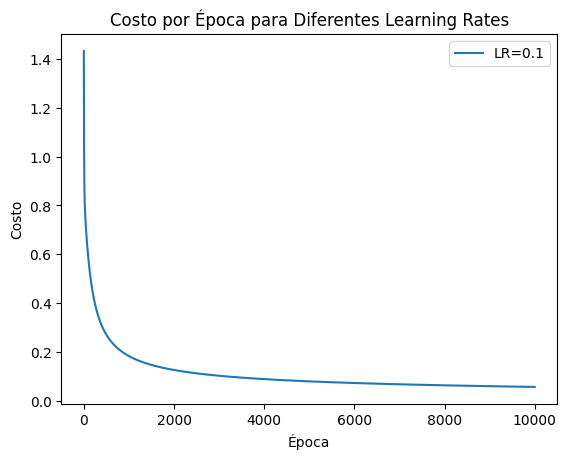

In [513]:
# Codificar las etiquetas con LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_extended)

# Codificar las etiquetas con OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y_encoded.reshape(-1, 1))

# Define una lista de learning rates para probar
lr = 0.1

np.random.seed(0)
w = np.random.randn(x_extended.shape[1], y_oh.shape[1]) * np.sqrt(2 / (x.shape[1] + y_oh.shape[1]))
b = np.zeros(y_oh.shape[1])  # Inicialización con ceros

# Hiperparámetros
epochs = 10000
costo_por_epoca = []

for epoch in range(epochs):
    # Propagación hacia adelante
    z = np.dot(x_extended, w) + b
    y_pred = softmax(z)

    # Cálculo de la función de costo
    cost = costo(y_oh, y_pred)
    costo_por_epoca.append(cost)

    # Propagación hacia atrás (Backpropagation)
    dw, db = gradiente(x_extended, y_oh, y_pred)

    # Actualización de parámetros con el learning rate actual (lr)
    w -= lr * dw
    b -= lr * db

plt.plot(range(epochs), costo_por_epoca, label=f'LR={lr}')

# Configurar el gráfico
plt.xlabel('Época')
plt.ylabel('Costo')
plt.legend()
plt.title('Costo por Época para Diferentes Learning Rates')
plt.show()

Text(0.5, 1.0, 'Malla de Clasificación para LR=0.1')

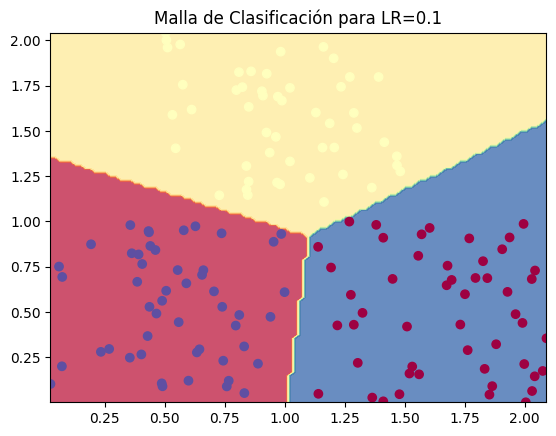

In [514]:
xx, yy = np.meshgrid(np.linspace(x_extended[:, 0].min(), x_extended[:, 0].max(), 100),
                         np.linspace(x_extended[:, 1].min(), x_extended[:, 1].max(), 100))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x_extended[:, 0], x_extended[:, 1], c=2-y_extended, cmap=plt.cm.Spectral)
plt.title(f'Malla de Clasificación para LR={lr}')